## Importing necessary modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import keras

## Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


<br/>

## Load the dataset

In [9]:
df = pd.read_csv('drive/My Drive/SimpleHousingPrice.csv')

<br/>

## Reconnaissance

In [10]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [5]:
df.shape

(1460, 2)

In [7]:
df.dtypes

SquareFeet    int64
SalePrice     int64
dtype: object

In [8]:
df.isnull().sum()

SquareFeet    0
SalePrice     0
dtype: int64

<br/>

## Splitting into X and y

In [60]:
X = df.SquareFeet
y = df.SalePrice

<br/>

## Splitting into train and test set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<br/>

## Model architecture with Keras

In [104]:
model = keras.Sequential()

model.add(keras.layers.Dense(1, input_shape = (1, )))

model.compile(keras.optimizers.Adam(lr = 0.5), 'mean_squared_error')

model.fit(X_train, y_train, epochs = 50, batch_size = 10, callbacks = keras.callbacks.EarlyStopping(patience=5, monitor="loss"))

Epoch 1/50
117/117 [==============================] - 0s 781us/step - loss: 24157683712.0000
Epoch 2/50
117/117 [==============================] - 0s 765us/step - loss: 8812845056.0000
Epoch 3/50
117/117 [==============================] - 0s 792us/step - loss: 4084707072.0000
Epoch 4/50
117/117 [==============================] - 0s 810us/step - loss: 3108636672.0000
Epoch 5/50
117/117 [==============================] - 0s 784us/step - loss: 2987293184.0000
Epoch 6/50
117/117 [==============================] - 0s 781us/step - loss: 2972588800.0000
Epoch 7/50
117/117 [==============================] - 0s 979us/step - loss: 2974774784.0000
Epoch 8/50
117/117 [==============================] - 0s 854us/step - loss: 2970625792.0000
Epoch 9/50
117/117 [==============================] - 0s 814us/step - loss: 2975218176.0000
Epoch 10/50
117/117 [==============================] - 0s 819us/step - loss: 2971732480.0000
Epoch 11/50
117/117 [==============================] - 0s 821us/step - loss: 2

<br/>

## Prediction

In [105]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

<br/>

## Accuracy Score

In [106]:
print('Training Accuracy : {}'.format(r2_score(y_train, y_pred_train)))
print('Testing Accuracy : {}'.format(r2_score(y_test, y_pred_test)))

Training Accuracy : 0.5178976543868254
Testing Accuracy : 0.41919358537715634


<br/>

## Visualize the model accuracy

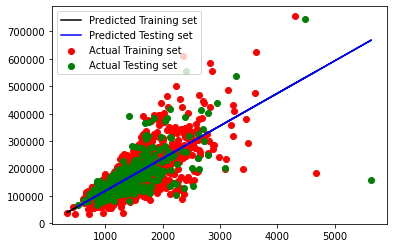

In [107]:
plt.scatter(X_train, y_train, color = 'red', label ='Actual Training set')
plt.plot(X_train, y_pred_train, color = 'black', label = 'Predicted Training set')

plt.scatter(X_test, y_test, color = 'green', label ='Actual Testing set')
plt.plot(X_test, y_pred_test, color = 'blue', label = 'Predicted Testing set')

plt.legend()
plt.show()

<br/>

## Prediction with a totally new data point

In [108]:
new_sf = 2000
price = model.predict([new_sf])

print('The price of {} squaref house is {}'.format(new_sf, price[0][0]))

The price of 2000 squaref house is 237025.640625
